# Quadratic predictor

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import math

## Toy dataset

We generate it so that it's not separable by a linear predictor

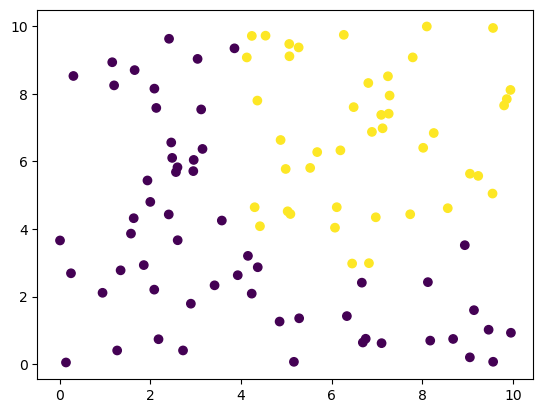

In [2]:
def label(X,angle=30,shift=[-5,-3],a=0.3):
    X=X+np.array([shift])
    angle=math.radians(angle)
    return a*(X[:,0]*math.cos(angle)-X[:,1]*math.sin(angle))**2<(X[:,0]*math.sin(angle)+X[:,1]*math.cos(angle))
X=np.random.random(size=(100,2))*10
y=label(X)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Next piece of code is for the contour plots that show the classification boundary

In [3]:
resolution=500
L1=np.linspace(-0.5,10.5,num=resolution)
L2=np.linspace(-0.5,10.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)

## Let's try with a linear predictor

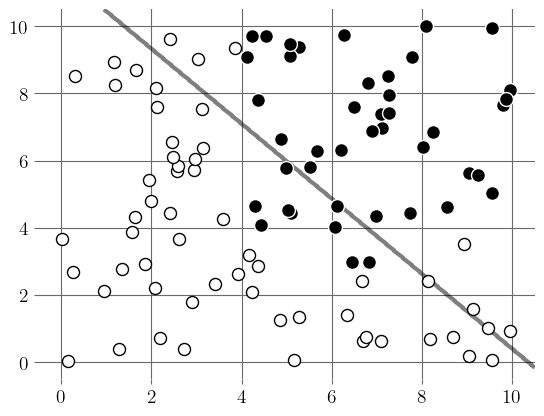

In [4]:
plt.style.use("lecture.mplstyle")

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(X,y)

Z=logreg.predict(np.array([XX.flatten(),YY.flatten()]).T)
Z=Z.reshape(XX.shape)
#plt.contourf(XX,YY,Z,alpha=0.5)
#plt.scatter(X[:,0],X[:,1],c=y,edgecolor='black')
plt.contour(XX,YY,Z,alpha=0.5,colors='black',zorder=5)
whites=X[y==0]
blacks=X[y==1]
plt.scatter(whites[:,0],whites[:,1],color="w",edgecolor='black',s=75,zorder=5)
plt.scatter(blacks[:,0],blacks[:,1],color="k",edgecolor='w',s=100,zorder=5)

#plt.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap='binary')
#plt.savefig('nonsep.png',dpi=300)

## Next, a quadratic predictor

As outlined in the lecture notes, we can turn a linear predictor into a quadratic one simply by transforming the training set. In scikit-learn this easily done in a preprocessing step. The class PolynomialFeatures turns a dataset into one with polynomial features of the desired degree (in our case 2). It works quite in a similar way as the predictors. That is, it has a fit step and then a transform step instead of a prediction step. Because we often perform these two steps consecutively, there is a method, fit_transform, that does this in one go. 

In [5]:
from sklearn.preprocessing import PolynomialFeatures
quad_feat=PolynomialFeatures(degree=2)
logreg2=LogisticRegression(solver='lbfgs')
logreg2.fit(quad_feat.fit_transform(X),y)

LogisticRegression()

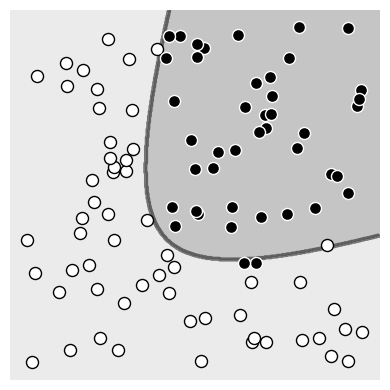

In [6]:
Z=logreg2.predict(quad_feat.fit_transform(np.array([XX.flatten(),YY.flatten()]).T))
Z=Z.reshape(XX.shape)

fig,ax=plt.subplots(figsize=(4,4))
ax.contourf(XX,YY,Z,alpha=0.3,cmap="binary",levels=1)
ax.contour(XX,YY,Z,alpha=0.5,colors='black')
whites=X[y==0]
blacks=X[y==1]
ax.scatter(whites[:,0],whites[:,1],color="w",edgecolor='black',s=75,zorder=5)
ax.scatter(blacks[:,0],blacks[:,1],color="k",edgecolor='w',s=75,zorder=5)
#plt.tick_params(left = False, right = False , labelleft = False , 
#                labelbottom = False, bottom = False) 
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.savefig("quadpred.png",dpi=300)